In [1]:
### Script to read shoes dataset downloaded from ... into a tensor

import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
%config IPCompleter.greedy=True

In [3]:
# open folder
root = '../Data/bootsData'

# for each folder open sub dir (each sub dir is a label)
#folders = {'Boots': 0, 'Sandals': 1, 'Shoes': 2, 'Slippers' : 3}
folders = {'Boots': 0}

#The "word" labels
#Labels = ['Boots','Sandals', 'Shoes', 'Slippers']
Labels = ['Boots']
finegrainLabels = []
subfinegrainLabels = []

#The data and numerical label
imList = []
labelList = [] #Boots, Sandals, Shoes, Slippers
finegrainLabelList = [] #Fine grain subcategories
subfinegrainLabelList = [] #FinER grain subcategories

fineLabelCounter = 0
subfineLabelCounter = 0
for folder in folders:
    print('processing ',folder,' folder...')
    subfolders = os.listdir(os.path.join(root, folder))
    for subfolder in subfolders:
        subsubfolders = os.listdir(os.path.join(root, folder, subfolder))
        for subsubfolder in subsubfolders:
            images = os.listdir(os.path.join(root, folder, subfolder, subsubfolder))
            for image in images:
                if image.endswith('.jpg'):
                    im = imread(os.path.join(root, folder, subfolder, subsubfolder, image))
                    if np.shape(im) == (136, 136, 3): #one image was (135, 135, 3)
                        imList.append(im)
                        labelList.append(folders[folder])
                        finegrainLabelList.append(fineLabelCounter)
                        subfinegrainLabelList.append(subfineLabelCounter)
            subfineLabelCounter+=1
            subfinegrainLabels.append(folder+'_'+subfolder+'_'+subsubfolder)
        fineLabelCounter+=1
        finegrainLabels.append(folder+'_'+subfolder)

processing  Boots  folder...


In [4]:
print('labels:', folders)
print('fine grain labels:', finegrainLabels[:10])
print('sub fine grain labels:', subfinegrainLabels[:10])

labels: {'Boots': 0}
fine grain labels: ['Boots_Prewalker Boots', 'Boots_Mid-Calf', 'Boots_Over the Knee', 'Boots_Ankle', 'Boots_Knee High']
sub fine grain labels: ['Boots_Prewalker Boots_Kid Express', 'Boots_Prewalker Boots_Timberland Kids', 'Boots_Mid-Calf_Hunter', 'Boots_Mid-Calf_pediped', 'Boots_Mid-Calf_Naturalizer', 'Boots_Mid-Calf_Cushe', 'Boots_Mid-Calf_Frye', 'Boots_Mid-Calf_La Sportiva', 'Boots_Mid-Calf_Franco Sarto', 'Boots_Mid-Calf_Merrell Kids']


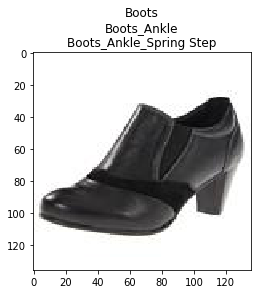

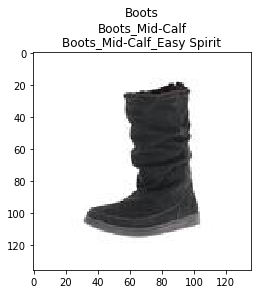

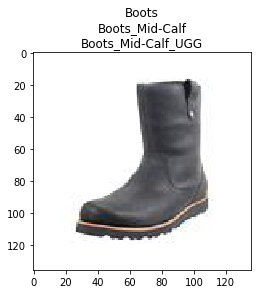

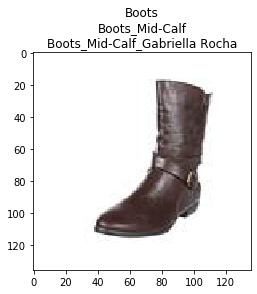

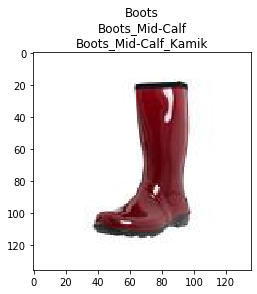

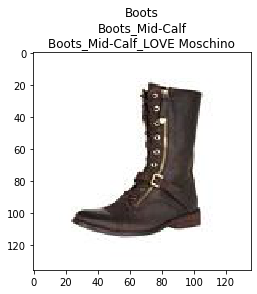

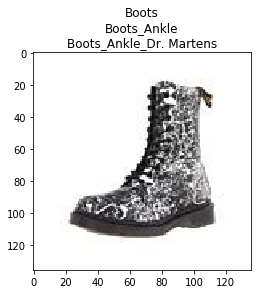

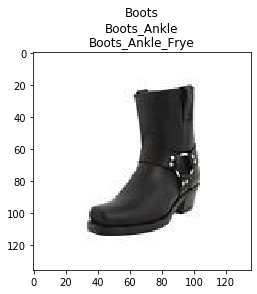

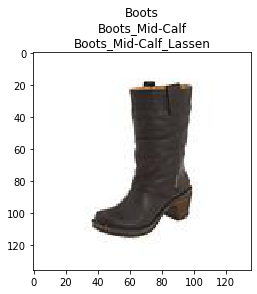

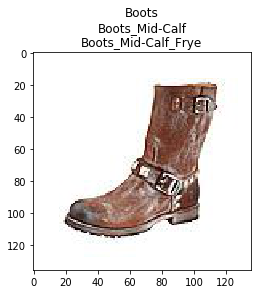

In [5]:
#show 10 examples
for i in range(10):
    eg = np.random.randint(len(imList))
    plt.figure()
    plt.imshow(imList[eg])
    eg_label = Labels[labelList[eg]]
    eg_fineLabel = finegrainLabels[finegrainLabelList[eg]]
    eg_subfineLabel = subfinegrainLabels[subfinegrainLabelList[eg]]
    plt.title(eg_label+'\n'+eg_fineLabel+'\n'+eg_subfineLabel)

In [6]:
#print out image details
imTensor = np.asarray(imList)
print('imTensor shape:', np.shape(imTensor))
labelTensor = np.asarray(labelList)
print('Label Tensor shape:', np.shape(labelTensor))
fineLabelTensor = np.asarray(finegrainLabelList)
print(np.shape(fineLabelTensor))
subfineLabelTensor = np.asarray(subfinegrainLabelList)
print(np.shape(subfineLabelTensor))

print('imTensor range: [',imTensor.min(), imTensor.max(), ']')
print('im Labels set: {', np.unique(labelTensor),'}')
print('fine Labels set: {', np.unique(fineLabelTensor), '}')
print('sub fine Labels set: {', np.unique(subfineLabelTensor), '}')


imTensor shape: (12832, 136, 136, 3)
Label Tensor shape: (12832,)
(12832,)
(12832,)
imTensor range: [ 0 255 ]
im Labels set: { [0] }
fine Labels set: { [0 1 2 3 4] }
sub fine Labels set: { [   0    1    2 ... 1093 1094 1095] }


In [7]:
#save the image, and label lists as tensors
np.save('../Data/bootsData/SHOES/xShoes.npy', imTensor)
np.save('../Data/bootsData/SHOES/yShoes.npy', labelTensor)
np.save('../Data/bootsData/SHOES/fineYShoes.npy', fineLabelTensor)
np.save('../Data/bootsData/SHOES/subfineYShoes.npy', subfineLabelTensor)

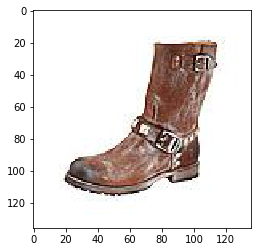

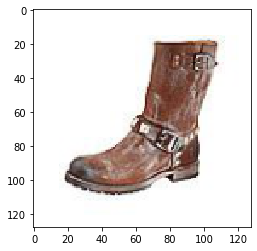

In [8]:
im = imTensor[eg]
im128 = resize(im, (128,128))
plt.imshow(im)
plt.figure()
plt.imshow(im128)

In [10]:
#Load and shuffle the datasets
xShoes = np.load('../Data/bootsData/SHOES/xShoes.npy')
yShoes = np.load('../Data/bootsData/SHOES/yShoes.npy')
fineY = np.load('../Data/bootsData/SHOES/fineYShoes.npy')
subfineY = np.load('../Data/bootsData/SHOES/subfineYShoes.npy')

